In [1]:
# pip install numpy pandas tensorflow matplotlib scikit-learn xgboost seaborn

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import plot_importance
from sklearn.compose import ColumnTransformer


c:\Users\nithe\Documents\projects\IS734_Intrusion_Detection_System\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
train_path = 'archive/KDDTrain+.txt'
test_path = 'archive/KDDTest+.txt'

In [4]:
# Load training data
data_train = pd.read_csv(train_path, header=None)

In [5]:
# Load testing data
test_data = pd.read_csv(test_path, header=None)

In [6]:
data_train.columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [7]:
print(data_train.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [8]:
print(data_train.head())      

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

In [9]:
print(data_train.describe())

           duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.00000

In [10]:
#simplifying attacks because we will convert these to 0 and 1
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

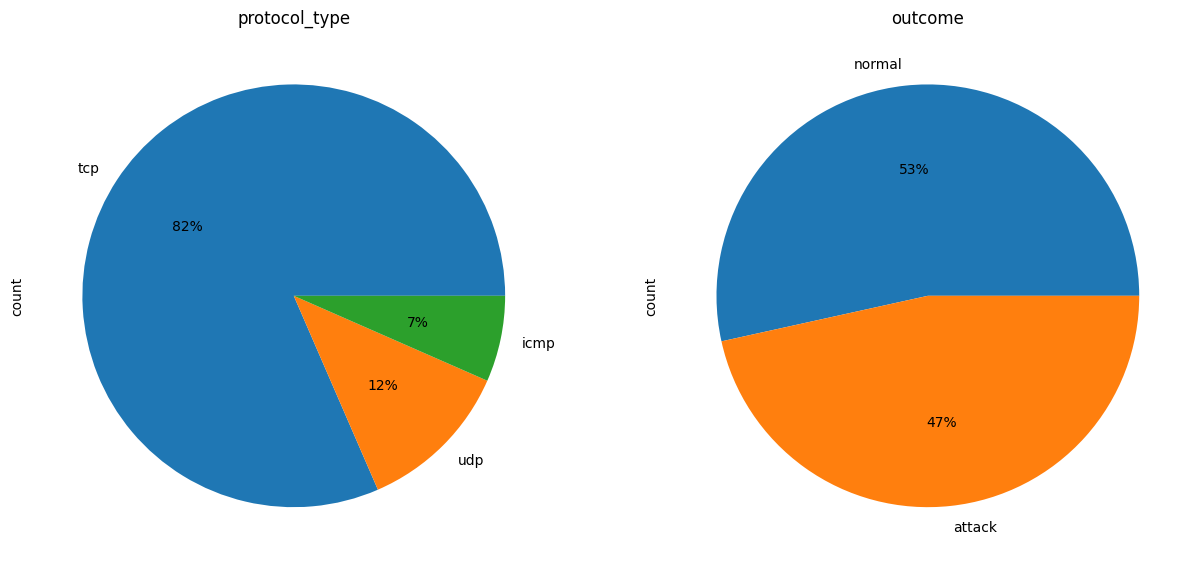

In [11]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

pie_plot (data_train, ['protocol_type', 'outcome'], 1, 2)

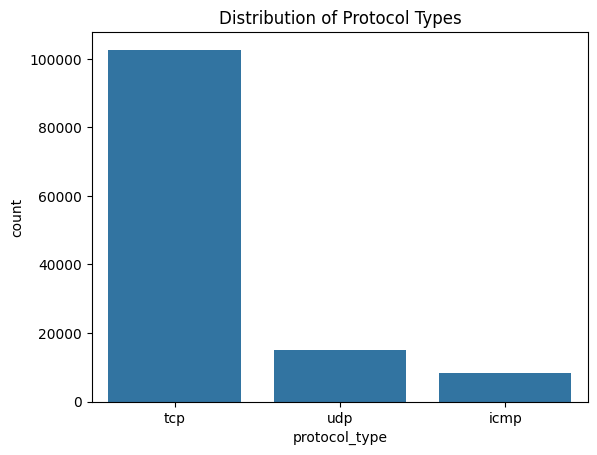

In [12]:
import seaborn as sns

sns.countplot(x='protocol_type', data=data_train)
plt.title('Distribution of Protocol Types')
plt.show()

In [13]:
# define column names
col_names = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
    "wrong_fragment","urgent","hot","num_failed_logins","logged_in",
    "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
    "num_shells","num_access_files","num_outbound_cmds","is_host_login",
    "is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
    "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
    "srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","outcome","level"
]

In [16]:
train_data = pd.read_csv(train_path, header=None, names=col_names)
test_data = pd.read_csv(test_path, header=None, names=col_names)

# define features
cat_cols = ['protocol_type', 'service', 'flag']
# grab other column as numericals
num_cols = [c for c in col_names if c not in cat_cols and c not in ['outcome', 'level']]

# build pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

In [17]:
# process data
# map outcome to 0 (normal) and 1 (attack)
y_train = train_data['outcome'].apply(lambda x: 0 if x == 'normal' else 1)
X_train_raw = train_data.drop(['outcome', 'level'], axis=1)

# fit and tranform
x_train = preprocessor.fit_transform(X_train_raw)

y_test = test_data['outcome'].apply(lambda x: 0 if x == 'normal' else 1)
X_test_raw = test_data.drop(['outcome', 'level'], axis=1)

# transform test
x_test = preprocessor.transform(X_test_raw)

print(f"Training shape: {x_train.shape}")
print(f"Test shape:     {x_test.shape}")

Training shape: (125973, 122)
Test shape:     (22544, 122)


In [18]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Linear SVM": LinearSVC(dual=False),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(), 
    "KNN (n=5)": KNeighborsClassifier(n_neighbors=5)
}

results = []

for name, model in models.items():
    print(f"Training {name}")
    # Train
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Calculate Scores
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    results.append([name, accuracy, precision, recall, f1])

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)

print("-" * 60)
print("FINAL RESULTS (Sorted by Accuracy)")
print(df_results)
print("-" * 60)

Training Logistic Regression


c:\Users\nithe\Documents\projects\IS734_Intrusion_Detection_System\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Random Forest
Training Linear SVM
Training Decision Tree
Training Naive Bayes
Training KNN (n=5)
------------------------------------------------------------
FINAL RESULTS (Sorted by Accuracy)
                 Model  Accuracy  Precision    Recall  F1 Score
3        Decision Tree  0.790853   0.965375  0.656121  0.781257
1        Random Forest  0.781183   0.968676  0.636172  0.767979
5            KNN (n=5)  0.755855   0.972534  0.587704  0.732660
0  Logistic Regression  0.751419   0.913606  0.622146  0.740219
2           Linear SVM  0.745564   0.914787  0.609834  0.731812
4          Naive Bayes  0.724627   0.905397  0.576483  0.704437
------------------------------------------------------------


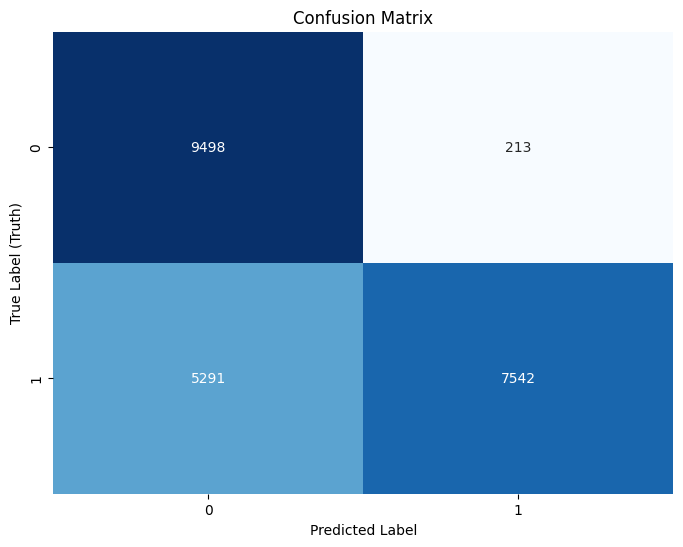

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# 2. Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label (Truth)')
plt.title('Confusion Matrix')
plt.show()

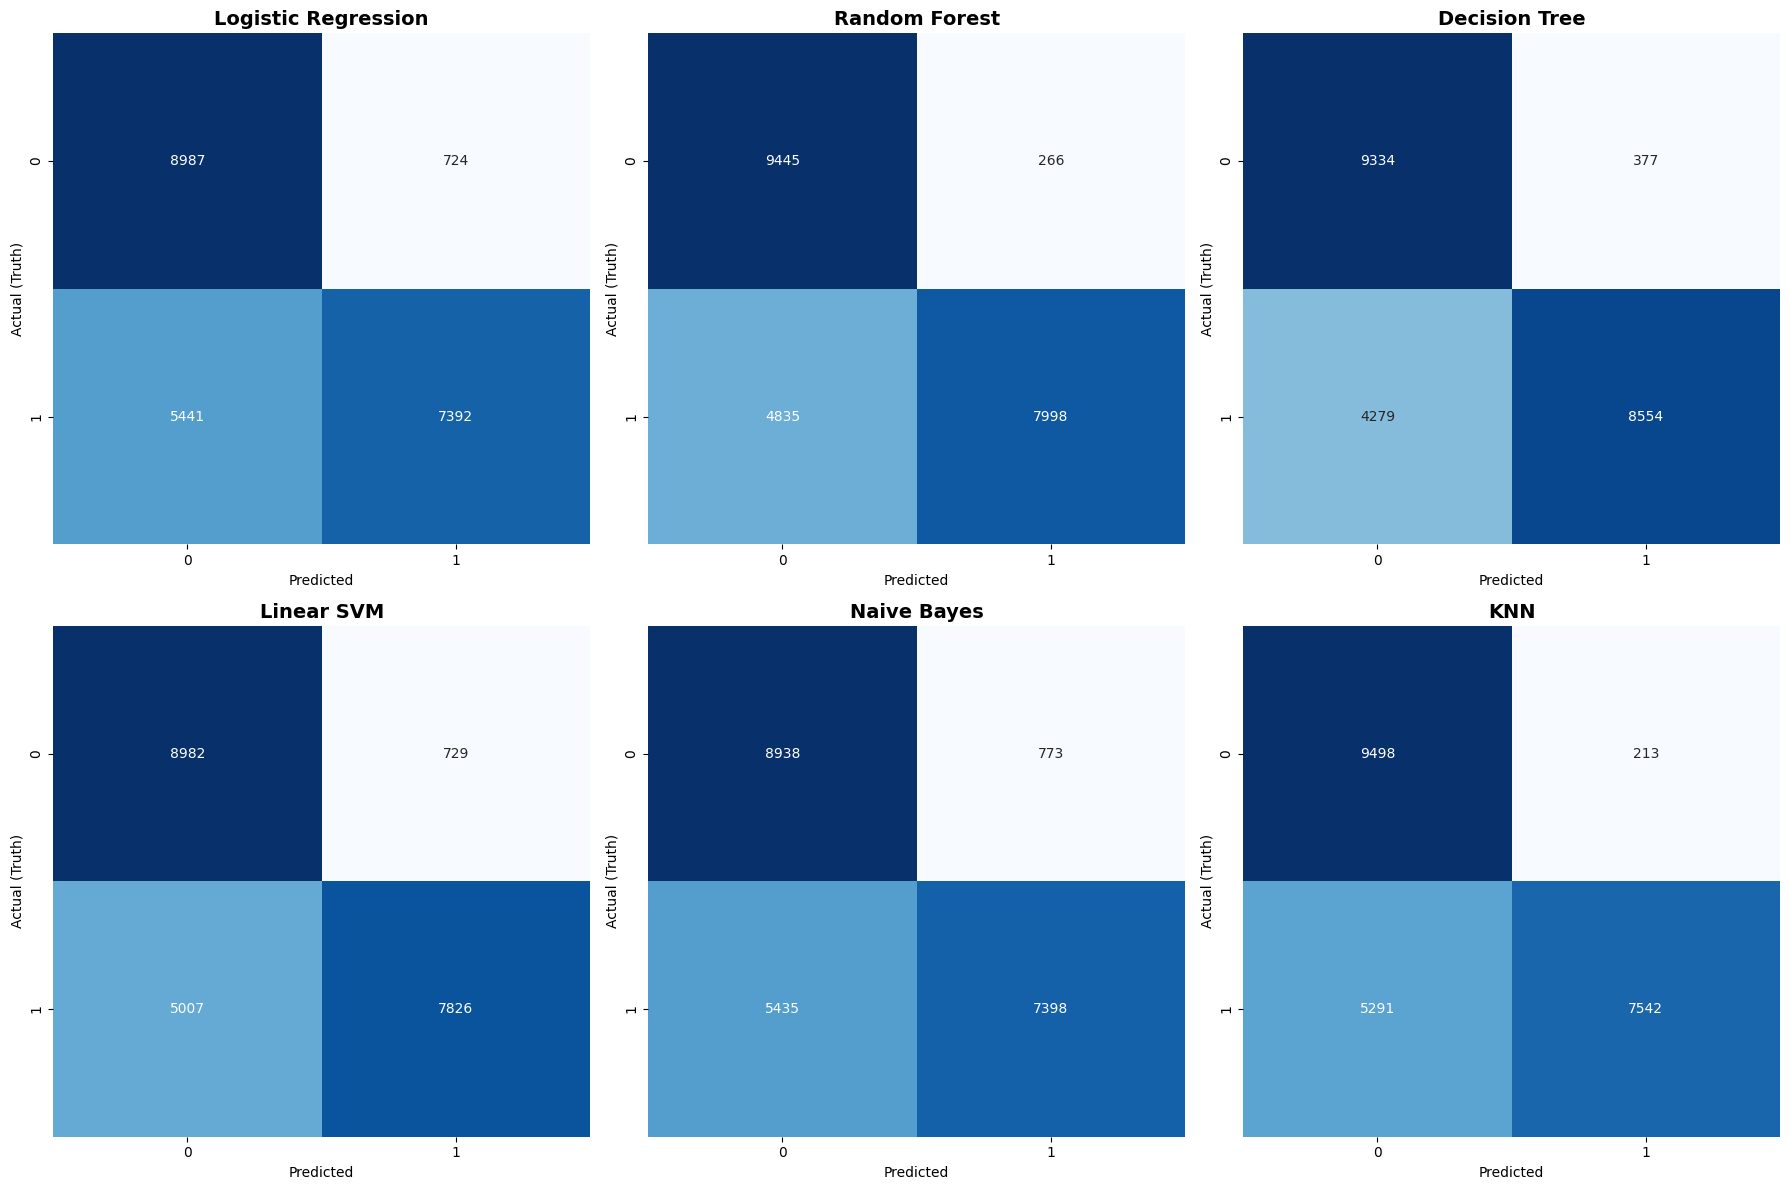

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

classifiers = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "Decision Tree": dt,
    "Linear SVM": svm,
    "Naive Bayes": nb,
    "KNN": knn
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  

for i, (name, model) in enumerate(classifiers.items()):
    y_pred_temp = model.predict(x_test)
    
    # Calculate the matrix
    cm = confusion_matrix(y_test, y_pred_temp)
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(f"{name}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual (Truth)')

plt.tight_layout()
plt.show()

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# max_depth=4: Prevent overfitting to specific byte counts
xgb_hunter = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight=3,  
    max_depth=4,         
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_hunter.fit(x_train, y_train)

y_pred_hunter = xgb_hunter.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_hunter))
print("\nClassification Report:\n", classification_report(y_test, y_pred_hunter))

c:\Users\nithe\Documents\projects\IS734_Intrusion_Detection_System\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:14:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8265170333569908

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.83      9711
           1       0.97      0.72      0.82     12833

    accuracy                           0.83     22544
   macro avg       0.85      0.84      0.83     22544
weighted avg       0.86      0.83      0.83     22544



In [41]:
import matplotlib.pyplot as plt

def f_importances(coef, names, top=-1):
    imp, names = zip(*sorted(zip(coef, names), reverse=True))
    
    # Default to showing all features if top is -1
    if top == -1:
        top = len(names)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    plt.barh(range(top), imp[:top], align='center')
    plt.yticks(range(top), names[:top])
    plt.title('Feature Importances')
    plt.xlabel('Importance Score')
    plt.gca().invert_yaxis() # Invert y-axis to have top feature at the top
    plt.show()

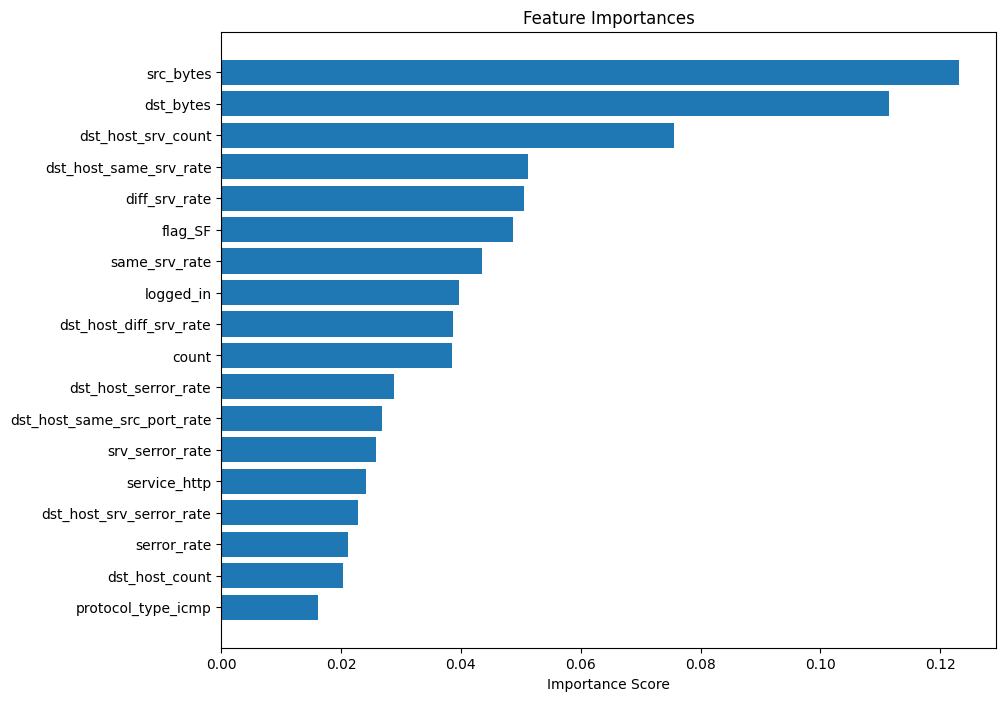

In [42]:
f_importances(abs(rf.feature_importances_), feature_names, top=18)

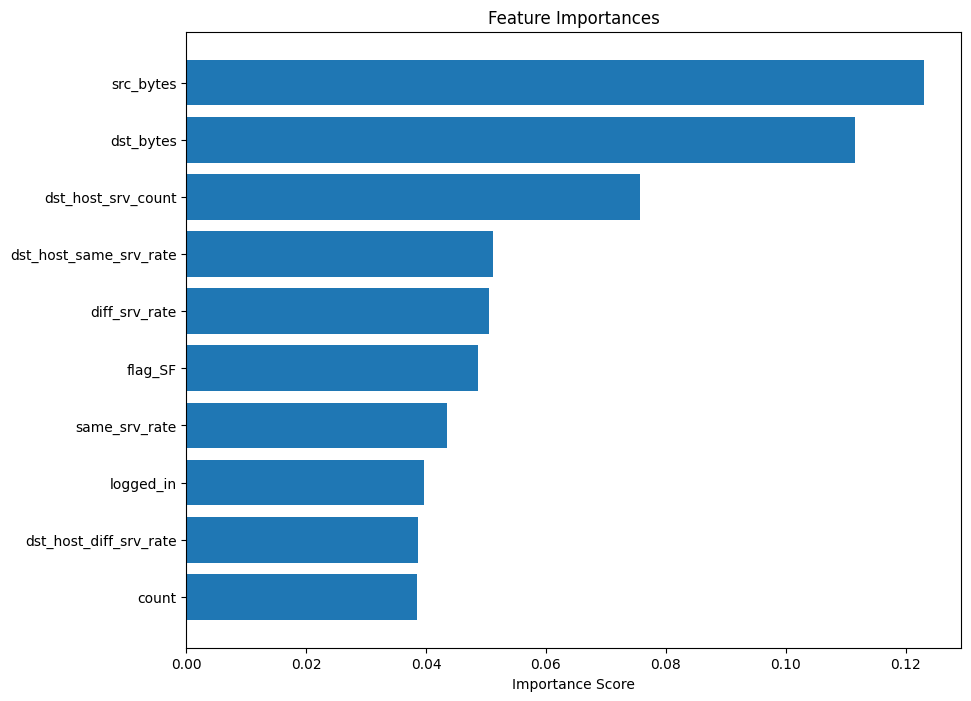

In [43]:
f_importances(abs(rf.feature_importances_), feature_names, top=10)

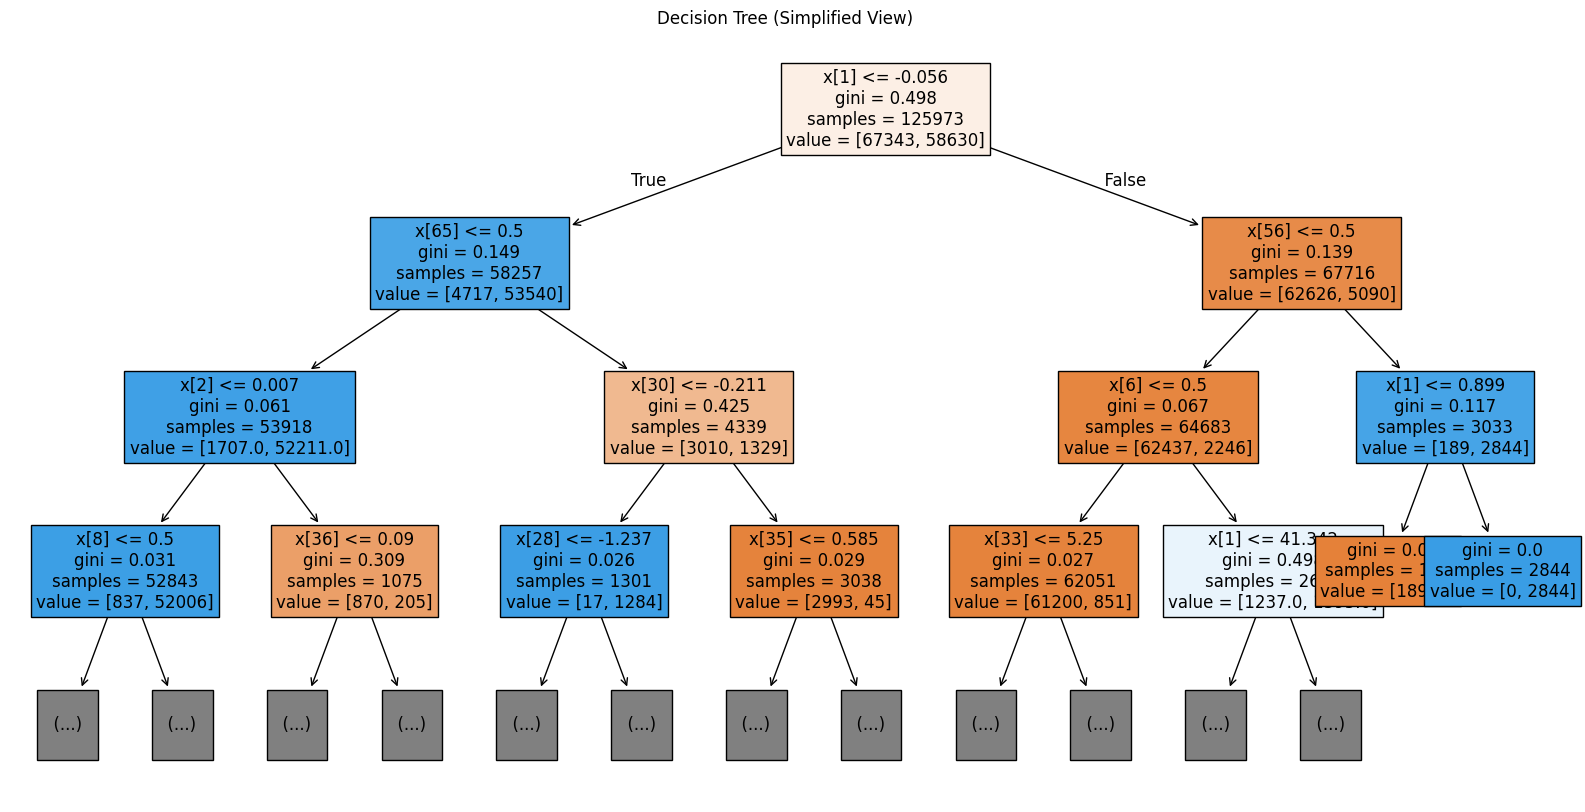

In [44]:
plt.figure(figsize=(20, 10))

tree.plot_tree(dt, filled=True, max_depth=3, fontsize=12)

plt.title("Decision Tree (Simplified View)")
plt.show()